### Imports

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import os
import matplotlib.cm as cm
import numpy as np

### Data frame

In [2]:
df = pd.read_csv('ProcessedAll.csv')
df

,DATE,Target WL,BRWL1,LaRWL1,LRWL1,WTDWL2,C1RS,C1RS1,C1RS2,C1RS3,...,C2RS7,C2RS14,C2RSF,C3RS,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF
0,2010-01-01,84.922581,20.702496,117.212338,9.500000,246.466571,0.3,2.216984,2.809389,0.118107,...,0.046003,0.100000,7,0.7,7.679192,3.029077,0.217122,0.992182,0.000000,7
1,2010-01-02,71.048611,15.115741,117.212338,7.300000,246.299333,6.3,4.119857,0.138676,0.100000,...,0.000000,5.937092,7,5.8,8.262197,0.135959,0.000000,5.544645,3.502215,7
2,2010-01-03,57.480645,11.142248,117.212338,7.300000,246.277667,0.2,0.172228,0.100000,1.324406,...,1.705466,0.000000,7,0.2,0.091254,0.000000,0.238249,0.756802,3.020568,7
3,2010-01-04,52.046032,10.187172,117.212338,6.600000,246.241000,0.1,0.100000,0.298556,0.000000,...,1.894282,3.191169,0,0.0,0.000000,0.235536,0.458457,0.597183,2.181716,7
4,2010-01-05,40.793939,7.289063,117.212338,6.600000,246.241000,0.1,0.463042,0.692555,0.108253,...,0.133828,0.000000,0,0.0,1.284342,0.676833,0.014221,0.078738,0.266983,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,2019-10-31,19.093679,2.451022,103.597468,7.748583,243.956000,0.0,9.161683,6.862736,4.347939,...,3.602407,1.930565,6,0.0,0.000000,5.419976,3.506746,3.325564,0.000000,0
3584,2019-11-01,19.529924,2.425664,103.860897,8.566926,243.894750,11.8,5.182064,5.157373,7.208479,...,1.247558,0.692614,6,14.4,9.863716,3.995350,4.262794,6.858315,0.057173,4
3585,2019-11-02,23.127991,2.838053,106.528125,10.302299,243.906556,4.9,4.520576,5.628847,7.983038,...,3.975002,0.898759,6,4.0,5.495787,6.515957,9.035480,8.010911,0.211898,4
3586,2019-11-03,20.716932,2.484042,104.476730,8.928016,243.963727,4.3,12.117782,15.424044,3.683143,...,1.443575,16.564550,6,5.5,9.400042,7.090957,4.963055,3.590645,10.923110,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       3588 non-null   object 
 1   Target WL  3588 non-null   float64
 2   BRWL1      3588 non-null   float64
 3   LaRWL1     3588 non-null   float64
 4   LRWL1      3588 non-null   float64
 5   WTDWL2     3588 non-null   float64
 6   C1RS       3588 non-null   float64
 7   C1RS1      3588 non-null   float64
 8   C1RS2      3588 non-null   float64
 9   C1RS3      3588 non-null   float64
 10  C1RS7      3588 non-null   float64
 11  C1RS14     3588 non-null   float64
 12  C1RSF      3588 non-null   int64  
 13  C2RS       3588 non-null   float64
 14  C2RS1      3588 non-null   float64
 15  C2RS2      3588 non-null   float64
 16  C2RS3      3588 non-null   float64
 17  C2RS7      3588 non-null   float64
 18  C2RS14     3588 non-null   float64
 19  C2RSF      3588 non-null   int64  
 20  C3RS    

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y-%m-%d")

C:\Users\hp\AppData\Local\Temp\ipykernel_7044\1008802037.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


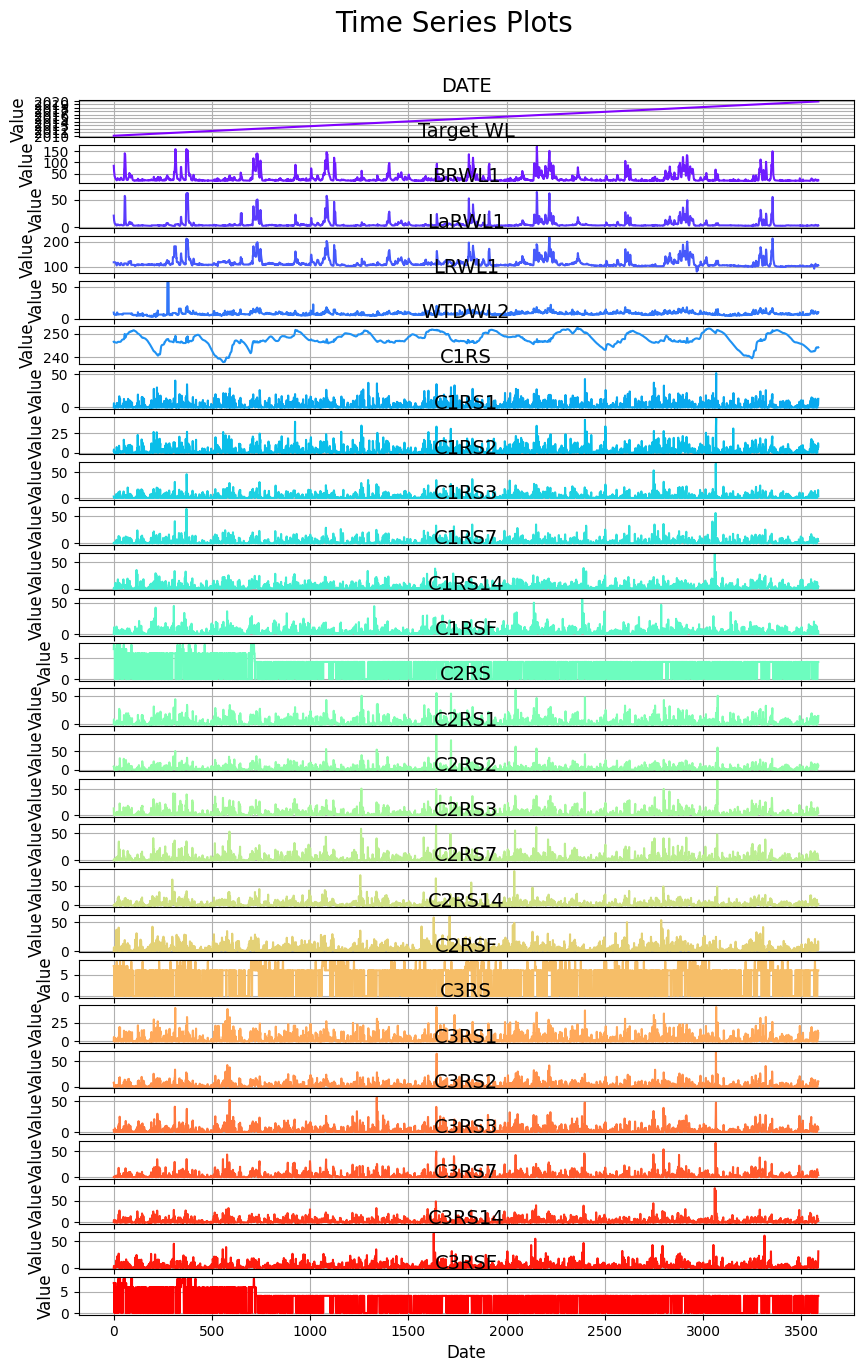

In [5]:
colors = cm.rainbow(np.linspace(0, 1, len(df.columns)))
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(10, 15))
fig.suptitle('Time Series Plots', fontsize=20)
for i, col in enumerate(df.columns):
    df[col].plot(ax=axes[i], grid=True, color=colors[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('Date', fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('folder_for_qnn_plots/time_series_plots.png', dpi=300)
plt.show()

In [6]:
df_input = df.drop('DATE', axis=1)

In [7]:
df_input

,Target WL,BRWL1,LaRWL1,LRWL1,WTDWL2,C1RS,C1RS1,C1RS2,C1RS3,C1RS7,...,C2RS7,C2RS14,C2RSF,C3RS,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF
0,84.922581,20.702496,117.212338,9.500000,246.466571,0.3,2.216984,2.809389,0.118107,0.144913,...,0.046003,0.100000,7,0.7,7.679192,3.029077,0.217122,0.992182,0.000000,7
1,71.048611,15.115741,117.212338,7.300000,246.299333,6.3,4.119857,0.138676,0.100000,1.494333,...,0.000000,5.937092,7,5.8,8.262197,0.135959,0.000000,5.544645,3.502215,7
2,57.480645,11.142248,117.212338,7.300000,246.277667,0.2,0.172228,0.100000,1.324406,1.080249,...,1.705466,0.000000,7,0.2,0.091254,0.000000,0.238249,0.756802,3.020568,7
3,52.046032,10.187172,117.212338,6.600000,246.241000,0.1,0.100000,0.298556,0.000000,0.232413,...,1.894282,3.191169,0,0.0,0.000000,0.235536,0.458457,0.597183,2.181716,7
4,40.793939,7.289063,117.212338,6.600000,246.241000,0.1,0.463042,0.692555,0.108253,0.033478,...,0.133828,0.000000,0,0.0,1.284342,0.676833,0.014221,0.078738,0.266983,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,19.093679,2.451022,103.597468,7.748583,243.956000,0.0,9.161683,6.862736,4.347939,4.206158,...,3.602407,1.930565,6,0.0,0.000000,5.419976,3.506746,3.325564,0.000000,0
3584,19.529924,2.425664,103.860897,8.566926,243.894750,11.8,5.182064,5.157373,7.208479,0.000000,...,1.247558,0.692614,6,14.4,9.863716,3.995350,4.262794,6.858315,0.057173,4
3585,23.127991,2.838053,106.528125,10.302299,243.906556,4.9,4.520576,5.628847,7.983038,3.084470,...,3.975002,0.898759,6,4.0,5.495787,6.515957,9.035480,8.010911,0.211898,4
3586,20.716932,2.484042,104.476730,8.928016,243.963727,4.3,12.117782,15.424044,3.683143,3.372005,...,1.443575,16.564550,6,5.5,9.400042,7.090957,4.963055,3.590645,10.923110,4


C:\Users\hp\AppData\Local\Temp\ipykernel_7044\4263811348.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


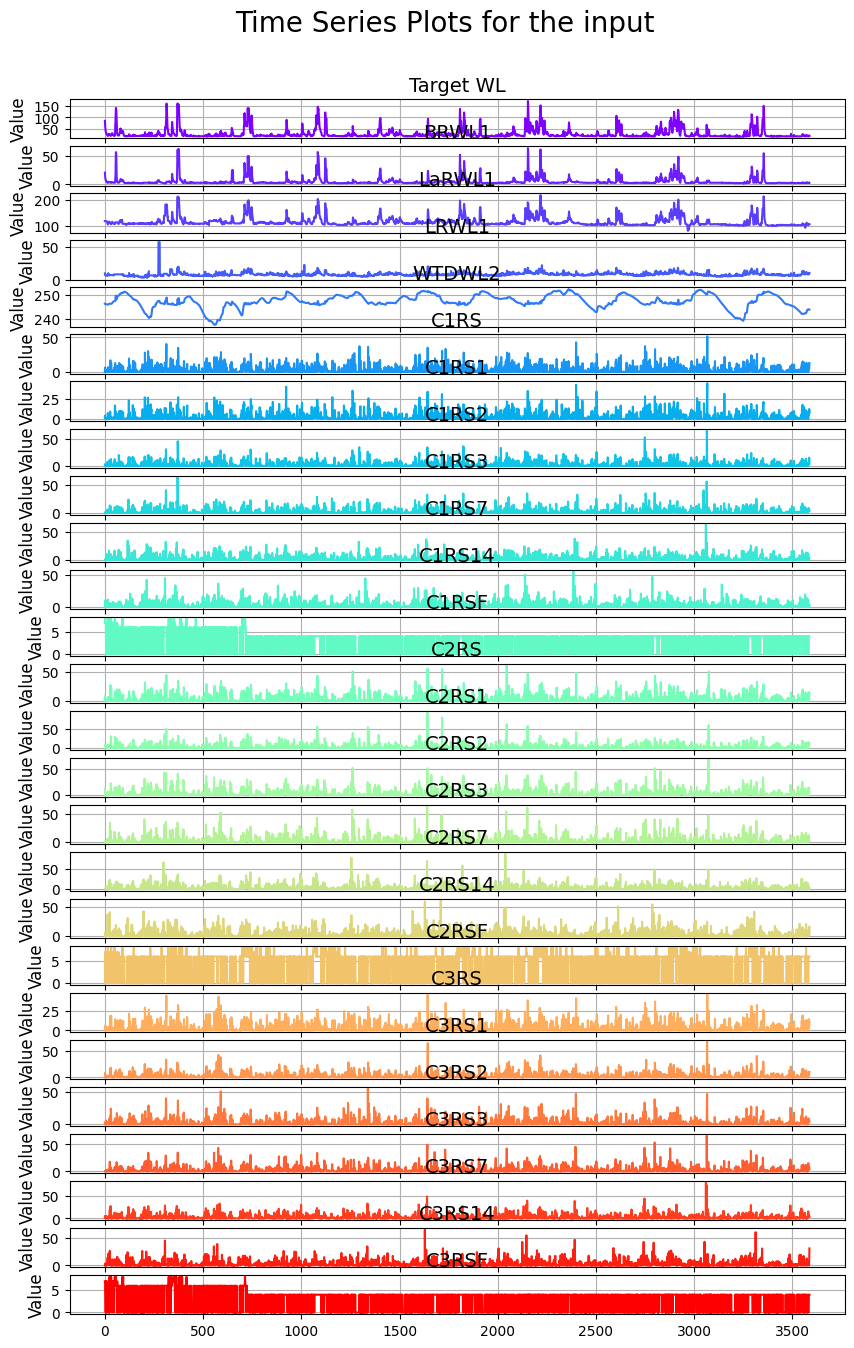

In [8]:
colors = cm.rainbow(np.linspace(0, 1, len(df_input.columns)))
fig, axes = plt.subplots(nrows=len(df_input.columns), figsize=(10, 15))
fig.suptitle('Time Series Plots for the input', fontsize=20)
for i, col in enumerate(df_input.columns):
    df_input[col].plot(ax=axes[i], grid=True, color=colors[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('Value', fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('folder_for_qnn_plots/df_input_plots.png', dpi=300)
plt.show()

In [9]:
df_input.describe()

,Target WL,BRWL1,LaRWL1,LRWL1,WTDWL2,C1RS,C1RS1,C1RS2,C1RS3,C1RS7,...,C2RS7,C2RS14,C2RSF,C3RS,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF
count,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,...,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000
mean,29.852173,5.249434,114.232975,7.902307,247.470599,2.671628,2.793895,2.779187,2.801961,2.774178,...,3.448966,3.443450,3.691750,2.779599,2.812308,2.824273,2.931225,2.910451,2.958124,2.520067
std,20.457605,6.932138,16.638477,3.168611,2.786887,4.922697,4.780685,4.856702,4.939897,4.662745,...,6.028729,5.805360,3.125258,5.211937,5.049566,5.107247,5.486678,5.083787,5.198531,2.302564
min,17.577167,1.068370,79.850000,2.647250,237.690500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.822624,2.503493,104.954567,6.300000,246.330071,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.836759,2.873828,108.255230,7.295183,247.282500,0.200000,0.517439,0.502384,0.485867,0.677829,...,0.831480,0.933016,6.000000,0.200000,0.467959,0.438220,0.453881,0.699274,0.692857,4.000000
75%,28.723380,4.494067,117.060151,8.715047,249.622333,3.300000,3.679355,3.789242,3.753647,3.602536,...,4.599941,4.544095,6.000000,3.400000,3.710517,3.727859,3.659913,3.880597,3.829895,4.000000
max,169.489966,64.165805,217.503597,57.350000,252.464652,51.700000,43.820207,66.627096,63.958702,64.027574,...,86.052820,60.219748,8.000000,45.900000,67.633370,55.085617,65.962542,78.228205,64.395035,8.000000


In [10]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)
data_scaled

array([[0.44331626, 0.31117155, 0.27142289, ..., 0.01268317, 0.        ,
        0.875     ],
       [0.35198775, 0.22262983, 0.27142289, ..., 0.07087782, 0.05438641,
        0.875     ],
       [0.26267358, 0.15965591, 0.27142289, ..., 0.00967429, 0.04690684,
        0.875     ],
       ...,
       [0.03653954, 0.02804683, 0.19380623, ..., 0.10240438, 0.0032906 ,
        0.5       ],
       [0.02066821, 0.02243629, 0.17890364, ..., 0.04589963, 0.16962659,
        0.5       ],
       [0.02073022, 0.02522725, 0.18170201, ..., 0.04860675, 0.47790472,
        0.5       ]])

In [11]:
features=data_scaled
target=data_scaled[:,0]

In [12]:
target

array([0.44331626, 0.35198775, 0.26267358, ..., 0.03653954, 0.02066821,
       0.02073022])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=123, shuffle = False)

In [14]:
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_test is: {y_test.shape}')
print(f'The shape of y_train is: {y_train.shape}')  

The shape of x_test is: (539, 26)
The shape of x_train is: (3049, 26)
The shape of y_test is: (539,)
The shape of y_train is: (3049,)


### Normalize the data

In [15]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


# QNN model design. 

In [16]:
from qiskit import Aer, execute
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import EfficientSU2

In [22]:
backend = Aer.get_backend('qasm_simulator')
num_qubits = len(x_train[0])
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='linear')

ansatz = EfficientSU2(num_qubits=num_qubits, reps=2, entanglement='linear')
optimizer = COBYLA(maxiter=500)

quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

def my_callback(eval_count, parameters, cost):
    print(f"Evaluation: {eval_count}, Cost: {cost}")

vqc = VQC(num_qubits=num_qubits, feature_map=feature_map, ansatz=ansatz, loss='cross_entropy', optimizer=optimizer, callback=my_callback)

C:\Users\hp\AppData\Local\Temp\ipykernel_7044\3490520640.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)


In [23]:
qnn = vqc.neural_network
circuit = qnn.circuit
decomposed_circuit = circuit.decompose()

fig_circuit = decomposed_circuit.draw('mpl', style='iqp')

In [24]:
fig_circuit.savefig('folder_for_qnn_plots/VQC_circuit.png', dpi=150, bbox_inches='tight')


In [20]:
from IPython.display import Image

Image('folder_for_qnn_plots/VQC_circuit.png')

In [25]:
vqc.fit(x_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
